# MNIST MLP

In this notebook we will implement a Multi Layer Perceptron using tensorflow and the famous MNIST dataset. We won't use keras to implement the nueral network as this is a specific exercise on the use of Tensorflow

In [15]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from tensorflow.examples.tutorials.mnist import input_data

## Functions

In [57]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Func(X * W + B) -> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

## Data
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

In [10]:
# Read the data
mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [18]:
# Train shape
mnist.train.images.shape

(55000, 784)

In [22]:
sample = mnist.train.images[2].reshape(28,28)

Let's visualize one of the training image to see how it looks like

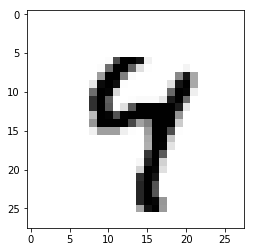

In [24]:
plt.imshow(sample, cmap = 'Greys')

## Hyperparameters
We now define the hyperparameters of the neural network

In [27]:
# Hyperparameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

We set the number of neurons of the two hidden layers equal to 256, this number is chosen because of the way computer stores images information (8 bit color storage). The number of classes is equal to 10 since the output of our neural network will be a vector of 10 elements.

For example an output of this type [0 0 0 0 0 0 1 0 0 0 ] will represent a 6. 

In [44]:
n_classes = 10
n_samples = mnist.train.num_examples
n_inputs = 784
n_hidden_neurons1 = 256
n_hidden_neurons2 = 256

Now we define a dictionary containing the weights of the two hidden layers and of the output layer. We initialize these weights at random  using a normal distribution

In [46]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_inputs, n_hidden_neurons1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_neurons1, n_hidden_neurons2])),
    'out': tf.Variable(tf.random_normal([n_hidden_neurons2,n_classes])) 
}

We initialize the biases in the same way, as we have done for the weights, using a random normal distribution

In [47]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_neurons1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_neurons2])),
    'out': tf.Variable(tf.random_normal([n_classes])) 
}

In [53]:
x = tf.placeholder('float', [None, n_inputs])
y = tf.placeholder('float', [None, n_classes])

In [64]:
pred = multilayer_perceptron(x, weights, biases)

We will use softmax cross entropy as cost function and 'Adam' optimizer

In [67]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

## Run the Session

In [79]:
sess = tf.InteractiveSession()

In [80]:
init = tf.global_variables_initializer()

In [81]:
sess.run(init)

## Training the Model

In [82]:
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict = {x: batch_x, y:batch_y})
        avg_cost = c/total_batch
    
    print("Epoch: {} cost {:.4f}".format(epoch+1, avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost 0.0810
Epoch: 2 cost 0.0410
Epoch: 3 cost 0.0387
Epoch: 4 cost 0.0206
Epoch: 5 cost 0.0063
Epoch: 6 cost 0.0067
Epoch: 7 cost 0.0210
Epoch: 8 cost 0.0129
Epoch: 9 cost 0.0132
Epoch: 10 cost 0.0004
Epoch: 11 cost 0.0113
Epoch: 12 cost 0.0051
Epoch: 13 cost 0.0072
Epoch: 14 cost 0.0001
Epoch: 15 cost 0.0068
Model has completed 15 Epochs of training


# Model Evaluations

In [83]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [88]:
correct_predictions = tf.cast(correct_predictions, 'float')
accuracy = tf.reduce_mean(correct_predictions)

Evaluate the model using the test data

In [89]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [92]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.94389999

Training the model with an higher number of epochs like 10000 it is possible to obtain an accuracy of 99 %. We won't do this here since this was just an exercise on the use of Tensorflow